# 1. Librerías

In [1]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords as sw

# 2. Leer Texto

In [3]:
opin=pd.read_excel('C:/Users/joseg/Documents/python/Datos/mltext.xlsx',sheetname='UNAM')

In [6]:
opin.head()

,estrellas,opinion
0,5.0,excelente universidad
1,5.0,me gusta mucho mi facultad :3
2,5.0,para mi la mejor universidad no porque estudie...
3,4.0,la amo
4,5.0,simplemente lo mejor.


In [5]:
opin['opinion']=opin.opinion.map(lambda x: x.lower())

# 3. Limpiar Texto

In [7]:
import unicodedata
def elimina_tildes(s):
    return ''.join((c for c in unicodedata.normalize('NFD', s) if unicodedata.category(c) != 'Mn'))
 
def replace_punctuation ( text ):
    return re.sub('[%s]' % re.escape(string.punctuation), '', text)

In [8]:
vocab=opin.opinion.tolist()
vocab=" ".join(vocab)
vocab=elimina_tildes(replace_punctuation(vocab))
vocab=vocab.replace(u'¿','')
vocab=vocab.replace(u'¡','')
vocab=sorted(vocab.split())

In [9]:
vocab=[wrd for wrd in vocab if wrd not in nltk.corpus.stopwords.words('spanish')]

In [10]:
freq=nltk.FreqDist(vocab)

In [11]:
sorted(freq.hapaxes())

[u'1',
 u'2',
 u'5',
 u'50',
 u'9',
 u'abarca',
 u'abierta',
 u'abrieron',
 u'abuso',
 u'acadeemico',
 u'academicas',
 u'acedemico',
 u'acepta',
 u'actualizados',
 u'actualmente',
 u'adaptacion',
 u'adecuada',
 u'adecuado',
 u'adecuados',
 u'administrar',
 u'adoro',
 u'afectan',
 u'agrada',
 u'agradable',
 u'agradecer',
 u'agradecida',
 u'agradecido',
 u'ainstiitucion',
 u'alborotadera',
 u'altura',
 u'alumnosprofesores',
 u'amada',
 u'ambitos',
 u'amistades',
 u'amor',
 u'amplias',
 u'amplio',
 u'anahuac',
 u'aparte',
 u'aportar',
 u'apovechala',
 u'apoya',
 u'apoyan',
 u'apoyar',
 u'aprenda',
 u'aprendas',
 u'aprender',
 u'aprendido',
 u'aprendizaje',
 u'aprendizajeestudio',
 u'apropiadas',
 u'aprovecha',
 u'aprovechas',
 u'aprovechen',
 u'aptitudes',
 u'aquellos',
 u'arte',
 u'asombrosa',
 u'asombrosas',
 u'aspecto',
 u'atender',
 u'atletismo',
 u'autonoma',
 u'autonomia',
 u'awesome',
 u'axima',
 u'ayor',
 u'ayuda',
 u'ayudado',
 u'bajos',
 u'barata',
 u'basarse',
 u'bases',
 u'bas

In [12]:
vocab=[wrd for wrd in vocab if len(wrd) >2]

In [13]:
len(vocab)

3340

# 4. Vectorizar

In [14]:
opin['opinion']=opin.opinion.apply(elimina_tildes)
opin['opinion']=opin.opinion.apply(replace_punctuation)

In [15]:
opin.head()

,estrellas,opinion
0,5.0,excelente universidad
1,5.0,me gusta mucho mi facultad 3
2,5.0,para mi la mejor universidad no porque estudie...
3,4.0,la amo
4,5.0,simplemente lo mejor


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
sw=nltk.corpus.stopwords.words('spanish')
sw.extend([wrd for wrd in vocab if len(wrd) <=2])

In [20]:
tfv= TfidfVectorizer(max_features=8000,
                     stop_words=sw,
                     use_idf=True,
                     #tokenizer=vocab,
                     ngram_range=(1,4))
tfvm=tfv.fit_transform(opin.opinion)

In [21]:
tfvm.shape

(531, 7214)

# 5. Modelación No Supervisada

In [22]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [23]:
km=KMeans(n_clusters=4,n_jobs=-1)
gmm=GaussianMixture(n_components=4)

In [24]:
km.fit(tfvm)
gmm.fit(tfvm.toarray())

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [25]:
opin['km']=km.predict(tfvm)
opin['gmm']=gmm.predict(tfvm.toarray())

In [29]:
opin.gmm.value_counts()

0    253
1    141
3    100
2     37
Name: gmm, dtype: int64

In [27]:
from wordcloud import WordCloud

Cluster 0


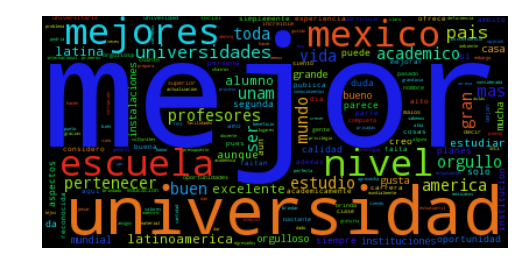

Cluster 1


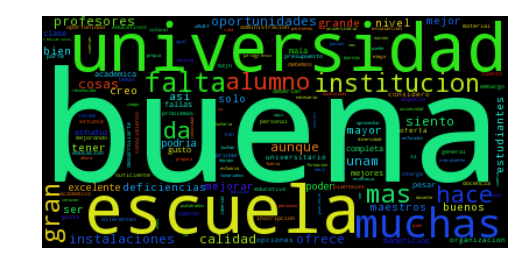

Cluster 2


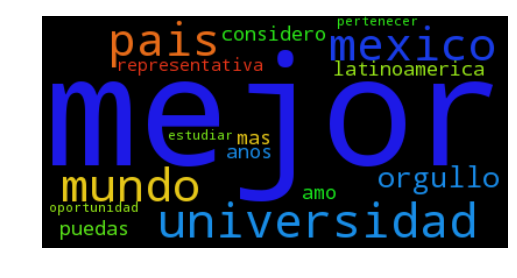

Cluster 3


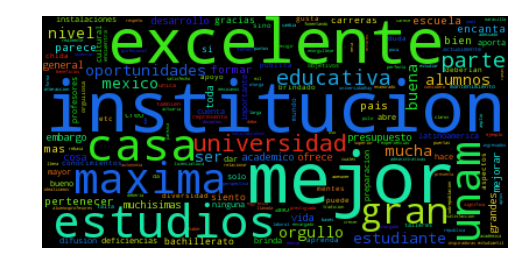

In [30]:
nube=[]
for i in range(0,4):
    text=opin[opin['gmm']==i]['opinion'].tolist()
    text=" ".join(text)
    text=sorted(text.split())
    text=[w for w in text if w not in sw]
    nube.append(" ".join(text))
    wordcloud = WordCloud(max_words=200).generate(nube[i])
    print 'Cluster %d'%i
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()